In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("city_day.csv")

In [ ]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [ ]:
df.sample(10)

City        Date   PM2.5    PM10      NO     NO2    NOx    NH3  \
1596    Ahmedabad  2019-05-16   33.97  116.32   14.67   79.71  55.61    NaN   
4123     Amritsar  2020-01-13   47.00   61.51    9.67   10.01  19.68  12.06   
16414   Hyderabad  2020-01-11   74.55  141.86   10.90   41.69  29.49  16.45   
25141       Patna  2018-11-29  195.57     NaN   27.69   12.48  20.04    NaN   
18785  Jorapokhar  2020-04-08   57.34  113.38   26.91   11.01    NaN   8.82   
14280    Guwahati  2019-09-05   13.85   29.83   10.12    9.13  26.37   5.16   
9385      Chennai  2019-04-01   68.09     NaN    6.55   12.50  19.02   1.34   
10903       Delhi  2016-11-05  588.39  763.58  135.71  113.31  90.09  89.10   
17943  Jorapokhar  2017-12-18     NaN     NaN     NaN     NaN    NaN    NaN   
23173      Mumbai  2018-08-11   11.70   40.69   14.08   21.17  35.26    NaN   

          CO    SO2     O3  Benzene  Toluene  Xylene    AQI    AQI_Bucket  
1596   14.67  91.26  51.86    15.55    83.89   13.15  330.0     Very Poor  
4123    0.40   6.24  25.62     1.83     2.09    2.00   74.0  Satisfactory  
16414   0.62  13.04  29.76     0.73     4.92    0.08  149.0      Moderate  
25141   3.58  51.82    NaN     4.00    25.94   18.78  355.0     Very Poor  
18785   1.46  28.34  48.77      NaN      NaN     NaN  133.0      Moderate  
14280   0.59  12.51  11.06     0.00      NaN     NaN   46.0          Good  
9385    0.98   6.34  19.13     0.02     0.00     NaN  130.0      Moderate  
10903   2.20  22.21  39.05     7.31    16.61     NaN  603.0        Severe  
17943    NaN    NaN    NaN      NaN      NaN     NaN    NaN           NaN  
23173   1.24  11.08  39.10     0.31      NaN     NaN   67.0  Satisfactory

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Handling missing values

In [ ]:
df.isnull().sum()/len(df)*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

As shown above, the following dataset has multiple columns with null values hence what we do is we have to clean the data and replace/remove those null values with computable data.

Standard rules for handling missing values:
1.   If NaN > 40%---> Remove the column
2.   If 4% < NaN < 40%---> Replace the NaN values with mean/median
3.   If NaN < 4%----> Remove/Drop the rows.

As Xylene is the only column with over 60% of its data as Null, we will remove Xylene column and for the rest, as they lie between 4-40% we will replace their values with mean/median



In [3]:
df.drop("Xylene",inplace=True,axis=1)

In [4]:
df.reset_index(drop=True)

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89   NaN           NaN  
...      ...    ...     ...      ...      ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN  50.0          Good  

[29531 rows x 15 columns]

Now for replacing the NaN values, we first need to know the accurate value of mean and median of each column.

In [ ]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene           AQI  
count  21490.000000  24850.000000  
mean       8.700972    166.463581  
std       19.969164    140.696585  
min        0.000000     13.000000  
25%        0.600000     81.000000  
50%        2.970000    118.000000  
75%        9.150000    208.000000  
max      454.850000   2049.000000

As shown above, all the above columns have their mean > median, hence we will replace all the NaN values with mean values of their respective column

In [5]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mean())

In [6]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI              0
AQI_Bucket    4681
dtype: int64

All the numeric columns with null values have been dealt with, now as AQI_Bucket is an object column and we do not know what to replace the value with, we will simply replace the NaN with mode of all values in AQI_Bucket

In [7]:
df['AQI_Bucket']=df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0])

In [ ]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

With all the null values dealt with, next let us begin analysing each individual column.
As we want to check the Air Quality in different states, we are going to primarily work with 6 of the most important columns from the dataset namely **[City , Date , PM2.5 , PM10 , AQI , AQI_Bucket]** as these columns generally dictate the quality of air and ignore rest of the columns as they are individual gas elements present in the atmosphere.

In [ ]:
# Univariate Analysis

Now we are going to check each column and find what sort of values are in them along with a simple graph representation

**1**. **City Column**

In [ ]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
df['City'].value_counts()

City
Ahmedabad             2009
Bengaluru             2009
Chennai               2009
Mumbai                2009
Lucknow               2009
Delhi                 2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: count, dtype: int64

**2. PM2.5**

<Axes: xlabel='PM2.5', ylabel='Density'>

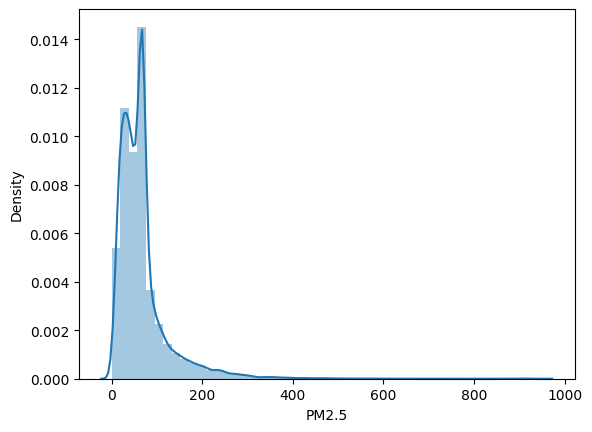

In [ ]:
sns.distplot(df['PM2.5'])

If you observe the above column, it tells us that the column PM2.5 is heavily skewed in the positive direction

**3. PM10**

<Axes: ylabel='PM10'>

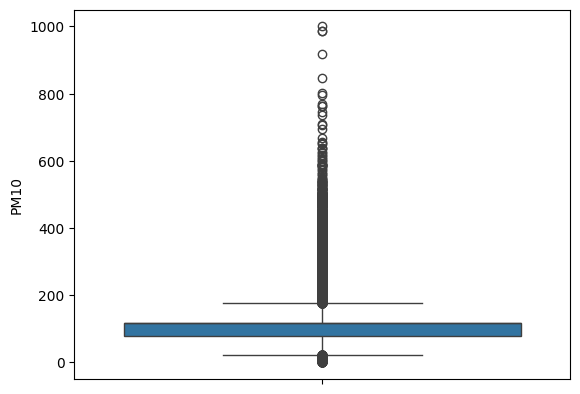

In [ ]:
sns.boxplot(df['PM10'])

**4. AQI**

<Axes: ylabel='AQI'>

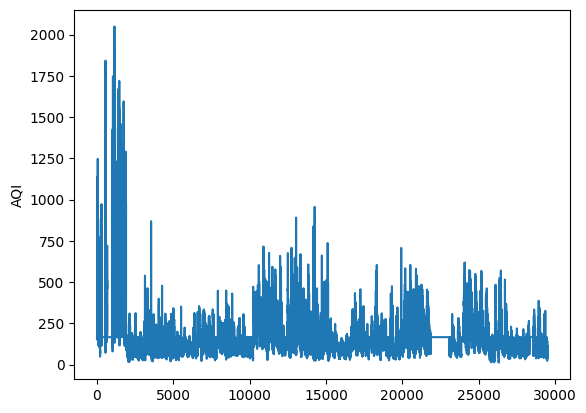

In [ ]:
sns.lineplot(df['AQI'])

**5. AQI_Bucket**

In [ ]:
sns.countplot(df['AQI_Bucket'])

<Axes: xlabel='count', ylabel='AQI_Bucket'>

As we will be using this dataset for Machine Learning as well, having a column with Unknown values can cause noise in model training hence we will replace all Unknown values with mode of all values in AQI_Bucket

In [8]:
df['AQI_Bucket']=df['AQI_Bucket'].replace('Unknown',df['AQI_Bucket'].mode()[0])

Let's see how the graph looks now with the modifications made

<Axes: xlabel='count', ylabel='AQI_Bucket'>

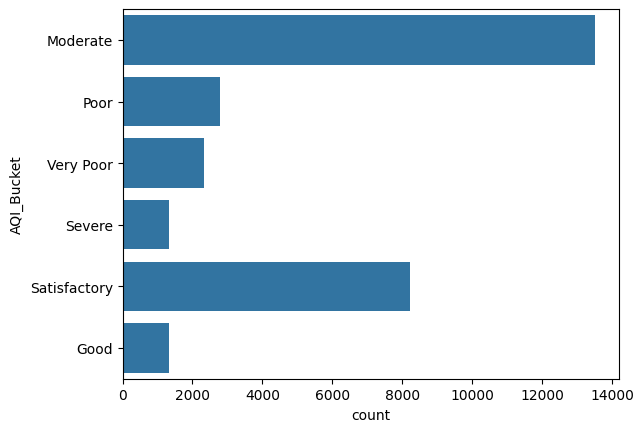

In [ ]:
sns.countplot(df['AQI_Bucket'])

In [ ]:
# Bivariate Analysis

AQI_Bucket V/S City

<Axes: xlabel='City'>

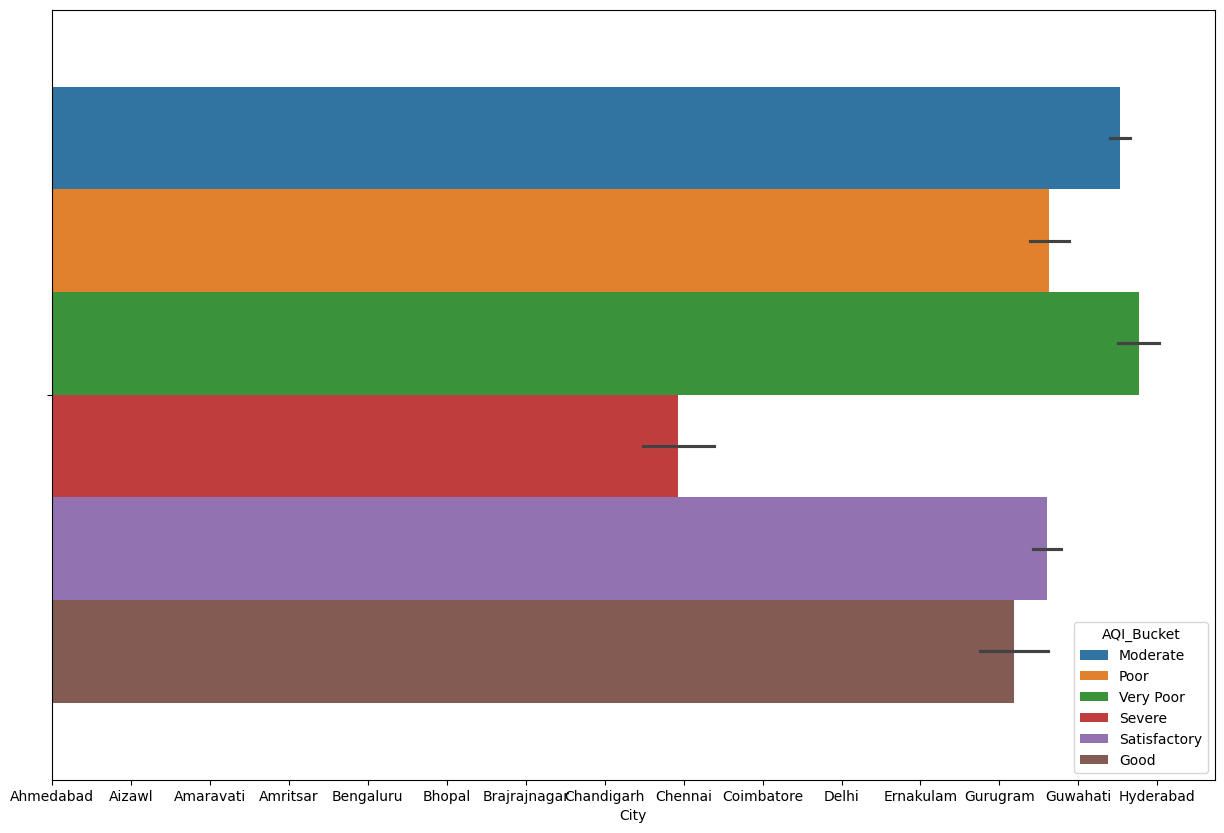

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='City',hue='AQI_Bucket',data=df)

Heatmap for all features

<Axes: >

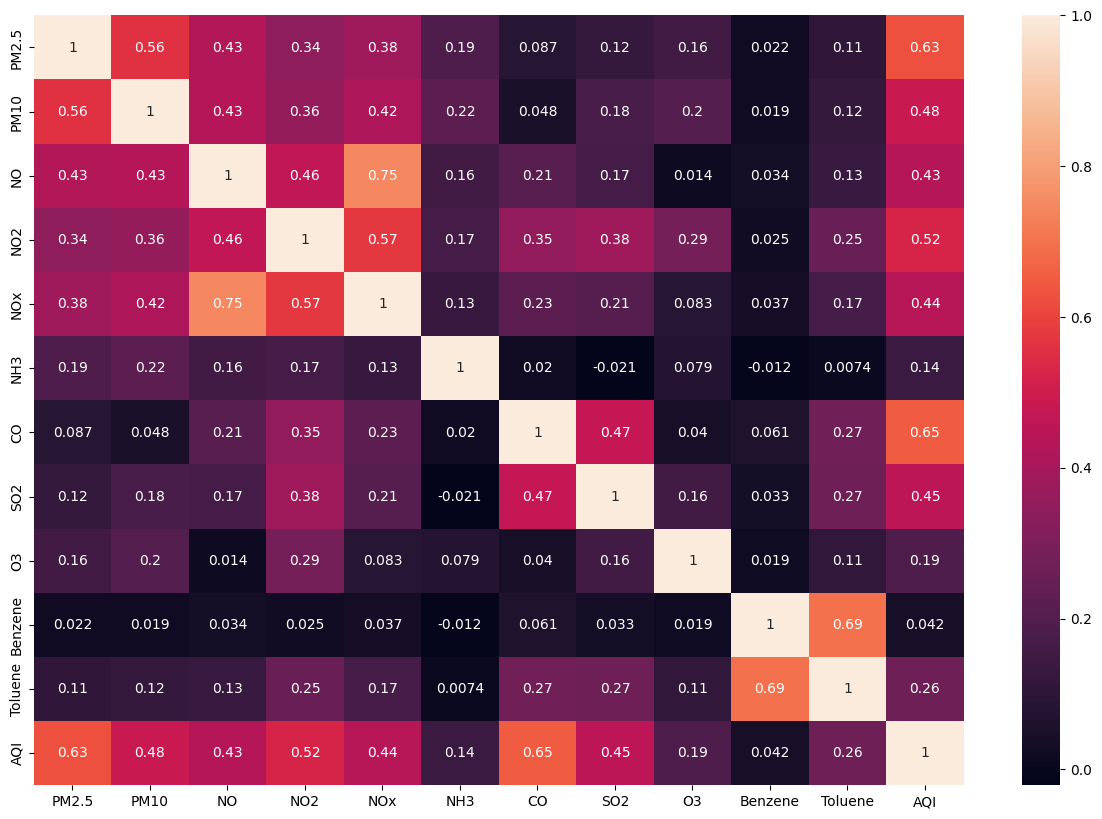

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

Model Preparation and Training

In [ ]:
pip install scikit-learn

As we move on with model development, we have to seperate our data into features and target variable. Hence we have to decide which features are eligible or necessary for target prediction and model training.

Hence we will remove the columns which we do not need for model training i.e we will remove the Date column from our dataset as it is irrelevant for model training

In [9]:
final=df['Date']

In [10]:
df.drop('Date',axis=1,inplace=True)

As AQI_Bucket is a categorical column, we will have to encode it to proceed with the model development

In [ ]:
df['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [11]:
aqi_bucket_map={
    "Severe":0,
    "Very Poor":1,
    "Poor":2,
    "Moderate":3,
    "Satisfactory":4,
    "Good":5
}

In [12]:
df['AQI_Bucket']=df['AQI_Bucket'].map(aqi_bucket_map)


In [ ]:
df['AQI_Bucket'].value_counts()

AQI_Bucket
3    13510
4     8224
2     2781
1     2337
5     1341
0     1338
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['City'], dtype='object')

In [16]:
for i in cat_cols:
  df[i]=le.fit_transform(df[i])

In [17]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [18]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [ ]:
X_train.shape

(23624, 13)

In [ ]:
X_test.shape

(5907, 13)

In [ ]:
Y_train.shape

(23624,)

In [ ]:
Y_test.shape

(5907,)

In [21]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [24]:
def model_build(model):
  model.fit(X_train,Y_train)
  Y_train_pred=model.predict(X_train)
  Y_test_pred=model.predict(X_test)
  print("Trained Data")
  print(classification_report(Y_train,Y_train_pred))
  print("Tested Data")
  print(classification_report(Y_test,Y_test_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()
model_build(lr)

Trained Data
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1078
           1       0.95      0.98      0.96      1854
           2       0.98      0.92      0.95      2237
           3       0.98      0.98      0.98     10748
           4       0.94      0.98      0.96      6614
           5       0.98      0.77      0.86      1093

    accuracy                           0.97     23624
   macro avg       0.97      0.93      0.95     23624
weighted avg       0.97      0.97      0.97     23624

Tested Data
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       260
           1       0.95      0.97      0.96       483
           2       0.97      0.91      0.94       544
           3       0.98      0.98      0.98      2762
           4       0.94      0.99      0.96      1610
           5       0.96      0.83      0.89       248

    accuracy                           0.97      590

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
model_build(knn)

Trained Data
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1078
           1       0.84      0.86      0.85      1854
           2       0.83      0.78      0.80      2237
           3       0.93      0.93      0.93     10748
           4       0.88      0.92      0.90      6614
           5       0.88      0.78      0.82      1093

    accuracy                           0.90     23624
   macro avg       0.88      0.86      0.87     23624
weighted avg       0.90      0.90      0.90     23624

Tested Data
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       260
           1       0.82      0.77      0.80       483
           2       0.75      0.69      0.72       544
           3       0.90      0.90      0.90      2762
           4       0.83      0.87      0.85      1610
           5       0.73      0.67      0.70       248

    accuracy                           0.85      590

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
model_build(dt)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
model_build(rf)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       260
           1       0.99      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bgc=BaggingClassifier()
model_build(bgc)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
aboost_clf=AdaBoostClassifier()
model_build(aboost_clf)

Trained Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1078
           1       0.00      0.00      0.00      1854
           2       0.00      0.00      0.00      2237
           3       0.68      1.00      0.81     10748
           4       0.86      1.00      0.92      6614
           5       0.00      0.00      0.00      1093

    accuracy                           0.73     23624
   macro avg       0.26      0.33      0.29     23624
weighted avg       0.55      0.73      0.63     23624

Tested Data
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       260
           1       0.00      0.00      0.00       483
           2       0.00      0.00      0.00       544
           3       0.68      0.99      0.80      2762
           4       0.85      1.00      0.92      1610
           5       0.00      0.00      0.00       248

    accuracy                           0.73      590

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gboost_clf=GradientBoostingClassifier()
model_build(gboost_clf)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xboost_clf=XGBClassifier()
model_build(xboost_clf)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       260
           1       0.99      0.98      0.98       483
           2       0.99      0.97      0.98       544
           3       0.99      0.97      0.98      2762
           4       0.95      0.98      0.96      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.97      590

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv_clf=SVC()
model_build(sv_clf)

Trained Data
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1078
           1       0.92      0.95      0.94      1854
           2       0.96      0.93      0.94      2237
           3       0.97      0.98      0.98     10748
           4       0.93      0.96      0.95      6614
           5       0.97      0.70      0.81      1093

    accuracy                           0.95     23624
   macro avg       0.95      0.91      0.93     23624
weighted avg       0.95      0.95      0.95     23624

Tested Data
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       260
           1       0.91      0.93      0.92       483
           2       0.95      0.89      0.92       544
           3       0.97      0.97      0.97      2762
           4       0.92      0.96      0.94      1610
           5       0.93      0.74      0.83       248

    accuracy                           0.95      590

Now as 4 out of 9 algorithms show the best performances, we will use GridSearchCV to perform Hypertuning cross validation to find the best parameters that yield the best performane. Another reason for using them is that the 4 algorithms display overfitting in the model so we have to hypertune them and get correct results for both training and testing

In [ ]:
from sklearn.model_selection import GridSearchCV

Cross Validation for Decision Tree

In [ ]:
dt_param={'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}

In [ ]:
# grid_dt=grid_dt=GridSearchCV(dt,param_grid=dt_param,cv=5,n_jobs=-1)
# grid_dt.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [ ]:
# grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [ ]:
dt_cv=DecisionTreeClassifier(criterion='gini',max_depth=4)
model_build(dt_cv)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

Cross Validation for RandomForest

In [ ]:
rf_param={'max_depth':[3,5,7,10],'n_estimators':[10,30,50],'criterion':['gini','entropy']}

In [ ]:
# grid_rf=GridSearchCV(rf,param_grid=rf_param,cv=5,n_jobs=-1)
# grid_rf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [10, 30, 50]})

In [ ]:
# grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}

In [26]:
rf_cv=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=50)
model_build(rf_cv)

Trained Data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       260
           1       0.98      0.98      0.98       483
           2       0.99      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.87      1.00      0.93       248

    accuracy                           0.98      590

Cross Validation for Bagging Classifier

In [ ]:
bag_param={
    "n_estimators": [30, 50, 100],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
    "bootstrap": [True, False]
}

In [ ]:
# grid_bag=GridSearchCV(bgc,param_grid=bag_param,cv=5,n_jobs=-1)
# grid_bag.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [30, 50, 100]})

In [ ]:
# grid_bag.best_params_

{'bootstrap': True,
 'max_features': 0.7,
 'max_samples': 0.5,
 'n_estimators': 30}

In [ ]:
bgc_cv=BaggingClassifier(bootstrap=True,max_features=0.5,max_samples=0.5,n_estimators=30)
model_build(bgc_cv)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.98       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.87      1.00      0.93       248

    accuracy                           0.98      590

Cross Validation for Gradient Boosting

In [ ]:
gboost_param={
    "n_estimators": [50, 100],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}

In [ ]:
# grid_gboost=GridSearchCV(gboost_clf,param_grid=gboost_param,cv=5,n_jobs=-1)
# grid_gboost.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]})

In [ ]:
# grid_gboost.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

In [ ]:
gboost_clf_cv=GradientBoostingClassifier(learning_rate=0.01,max_depth=3,n_estimators=50,subsample=0.8)
model_build(gboost_clf_cv)

Trained Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1078
           1       1.00      1.00      1.00      1854
           2       1.00      1.00      1.00      2237
           3       1.00      1.00      1.00     10748
           4       1.00      1.00      1.00      6614
           5       1.00      1.00      1.00      1093

    accuracy                           1.00     23624
   macro avg       1.00      1.00      1.00     23624
weighted avg       1.00      1.00      1.00     23624

Tested Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      0.98      0.99       483
           2       0.98      0.99      0.99       544
           3       1.00      0.99      0.99      2762
           4       0.98      0.98      0.98      1610
           5       0.86      1.00      0.93       248

    accuracy                           0.98      590

In [27]:
rf_cv=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=50)
rf_cv.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [34]:
import pickle
model_file=open("rf_model.pkl","wb")
sc_file=open("scaler.pkl","wb")
feature_file=open("features.pkl","wb")
pickle.dump(rf_cv,model_file)
pickle.dump(sc,sc_file)
pickle.dump(X.columns.tolist(),feature_file)
model_file.close()
sc_file.close()
feature_file.close()

In [35]:
# For decoding the City column
city_file=open("city_encode.pkl","wb")
pickle.dump(le,city_file)